In [64]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline      # To display the plots inside the Jupyter Notebook

UsageError: unrecognized arguments: # To display the plots inside the Jupyter Notebook


In [110]:
#Reading the CSV file
df=pd.read_csv("/home/sonia/PRATUSH/RFI/CleanTx.csv",nrows=400)
#df.set_index("Area Served", inplace = True) # Set 'Area Served' column as index on a Dataframe
#df=df.loc[["Perth", "Perth City"]] # Using the operator .loc[] to select multiple rows from the Dataframe
df

,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Licence Area ID,Status,Deg,Min,Sec,Deg1,Min1,Sec1,Latitude in degrees,Longitude in degrees
0,0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000.0,10010794,...,NaN,Issued,34,58,44,138,42,31,34.978889,138.708611
1,1,Adelaide,5FBI,92.7,Community,M,45,DA,20000.0,3371001,...,NaN,Issued,34,58,48,138,42,28,34.980000,138.707778
2,2,Adelaide,5DDD,93.7,Community,M,45,OD,6300.0,3076001,...,NaN,Issued,34,58,48,138,42,28,34.980000,138.707778
3,3,Adelaide,5UV,101.5,Community,M,60,DA,20000.0,6457001,...,NaN,Issued,34,58,44,138,42,31,34.978889,138.708611
4,4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000.0,4191001,...,NaN,Issued,34,58,57,138,42,30,34.982500,138.708333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,Burnie,NaN,97.7,HPON,M,28,DA,1000.0,10011351,...,NaN,Issued,41,4,12,145,57,6,41.070000,145.951667
396,396,Burnie,7ABCRR,102.5,National,M,28,DA,1000.0,6625001,...,NaN,Issued,41,4,12,145,57,6,41.070000,145.951667
397,397,Burnie City,7SEA,95.3,Commercial,M,12,DA,100.0,12000325,...,NaN,Issued,41,3,5,145,54,25,41.051389,145.906944
398,398,Burnie City,7BU,107.3,Commercial,M,12,DA,100.0,12000273,...,NaN,Issued,41,3,5,145,54,25,41.051389,145.906944


In [111]:
#Resolution of the map
nside = 512
print("The number of pixels for the given nside: " + str(hp.nside2npix(nside)))
#pixel_indices = hp.ang2pix(nside, np.deg2rad(df['Latitude in degrees'].to_numpy()) ,np.deg2rad(df['Longitude in degrees'].to_numpy()))
# Healpy pixel number when input angles are assumed to be longitude and latitude in degree
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(), lonlat=True)
df['Pixel_number']=pixel_indices
print(pixel_indices)

The number of pixels for the given nside: 3145728
[ 669461  669461  669461  669461  669461  669461  669461  669461  671508
  669461  669461  669461  669461  671508  669461  669461  669461  671508
  671508  671508  671508  671508  671508  671508  671508  671508  671508
 1212137 1212137 1212137 1212137 1212137  669460  663370  927584 1025870
 1025870 1025870 1025870 1025870 1025870 1025870 1025870  677533  677533
  669343  671390  671390  646979  649028  642883  642883  649028  624444
  624444  622397  622397  620349 1058570 1007356 1007356  941817  941817
  941817  941817  941817  941817  941817  941817  941817  941890  941890
  941890  941890  941890 1195784 1195784 1195784 1195784  878314 1220389
 1220389 1220389 1220389 1220389 1220389 1220389  773900  773900  681751
  681751  681751  587569  587569  589617  587569  958266  958266  958266
  620333  620333 1122010 1122010 1122010 1122010  683845  736916  773982
  778078  778078  778078  778078  778078  778078  773982  694031  802651
 

In [112]:
#Creating user defined input for the  altitude of the satellite above the Earth's surface
#altitude=int(input("Enter altitude of the satellite in km: "))

#Creating user defined spacing between 400 km to 36000 km in log scale
data_point=int(input("Enter number of data points : "))
altitude= np.logspace(np.log10(400),np.log10(36000),data_point) 
print(altitude)

Enter number of data points : 5
[  400.         1232.0281153  3794.7331922 11688.0449571 36000.       ]


In [113]:
FOV=np.zeros(len(altitude))
for i in range(0,len(altitude)):
# Consider a case of full coverage under elevation of 0 º
    Rad= 6371 # Mean radius of Earth in km
    FOV[i]= np.degrees(np.arcsin(Rad/(Rad+ altitude[i])))  # Field of view for maximal coverage in degrees when elevation is 0 º 
    print(" The Field of view of the satellite at a height of",altitude[i],"km is",FOV[i], "degrees")

 The Field of view of the satellite at a height of 400.0000000000001 km is 70.20740346885583 degrees
 The Field of view of the satellite at a height of 1232.0281152964096 km is 56.92486173306229 degrees
 The Field of view of the satellite at a height of 3794.733192202054 km is 38.80804848172823 degrees
 The Field of view of the satellite at a height of 11688.044957103548 km is 20.65788810753291 degrees
 The Field of view of the satellite at a height of 35999.99999999996 km is 8.647921564393318 degrees


In [114]:
# The surface of the coverage area of the Earth depends on the central angle
Central_angle=np.zeros(len(altitude))
for i in range(0,len(altitude)):
    Central_angle[i]=np.arccos(Rad/(Rad+altitude[i])) # Central angle in radians
    
    Dia_of_FOV=2*Central_angle*Rad  # Diameter of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV= Dia_of_FOV/2 # Radius of the FOV (disc on the Earth's surface)in km
    Rad_of_FOV=Rad_of_FOV/Rad  # Radius of the FOV in Radians
    print(" The Radius of the Field of View for a height of",altitude[i],"km in radians is",Rad_of_FOV[i])
Rad_of_FOV

 The Radius of the Field of View for a height of 400.0000000000001 km in radians is 0.3454459769872743
 The Radius of the Field of View for a height of 1232.0281152964096 km in radians is 0.5772700633104341
 The Radius of the Field of View for a height of 3794.733192202054 km in radians is 0.8934681045151526
 The Radius of the Field of View for a height of 11688.044957103548 km in radians is 1.210248162809867
 The Radius of the Field of View for a height of 35999.99999999996 km in radians is 1.4198616220420144


array([0.34544598, 0.57727006, 0.8934681 , 1.21024816, 1.41986162])

In [115]:
# The latitude and longitude of a satellite over Perth

#lon = np.deg2rad(116.084167) # Longitude of the satellite in radians
#lat = np.deg2rad(32.008333)  #Latitude of the satellite in radians
pixel_disc=[]
lon=116.084167 # Longitude of the satellite in degrees
lat=32.008333  # Latitude of the satellite in degrees
for i in range(0,len(Rad_of_FOV)):
    vec = hp.ang2vec(lon,lat,lonlat=True) # Using ang2vec convert angles that is co-latitude and longitude in radians to 3D position vector
    pixel_disc.append(hp.query_disc(nside, vec, radius=Rad_of_FOV[i])) # Array of indices of the pixel number that are inside the circle/disc specified by vec and radius
 
    #print(pixel_disc
pixel_disc

[array([ 337540,  337541,  337542, ..., 1238681, 1238682, 1238683]),
 array([ 146681,  146682,  146683, ..., 1601177, 1601178, 1601179]),
 array([  11191,   11192,   11193, ..., 2088604, 2088605, 2088606]),
 array([      0,       1,       2, ..., 2524837, 2524838, 2524839]),
 array([      0,       1,       2, ..., 2765236, 2765237, 2765238])]

In [116]:
data= np.zeros(hp.nside2npix(nside)) #creating an empty array for the total number of pixels for the given nside
large_disc=pixel_disc[4]  #Array of indices of the pixel number for the FOV w.r.t an altitude of 36000 km
medium_disc=pixel_disc[2] #Array of indices of the pixel number for the FOV w.r.t an altitude of 3794.7331922 km
tiny_disc=pixel_disc[0] #Array of indices of the pixel number for the FOV w.r.t an altitude of 400 km
                    
data[large_disc] = 1 # converting the value of the map at those indices
data[medium_disc] = 2
data[tiny_disc] = 3

data[large_disc]

array([1., 1., 1., ..., 1., 1., 1.])

/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

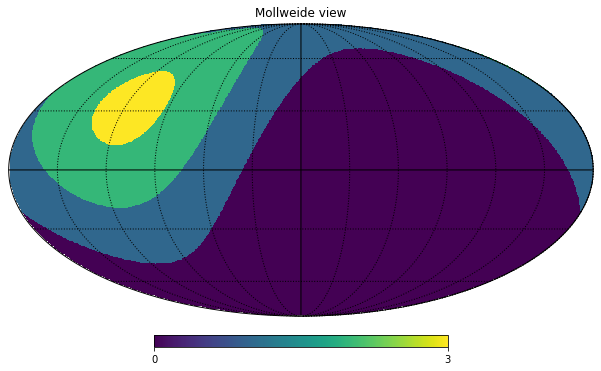

In [117]:
#Plot a healpix map (given as an array) in Mollweide projection
hp.mollview(data)
hp.graticule() # Adds meridians and parallels

<function matplotlib.pyplot.show(close=None, block=None)>

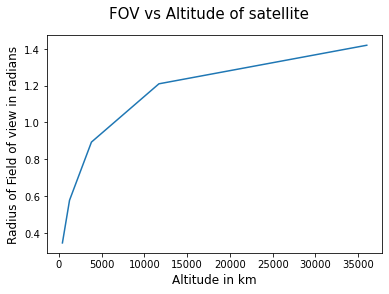

In [118]:
fig=plt.figure()
plt.plot(altitude, Rad_of_FOV)
fig.suptitle('FOV vs Altitude of satellite', fontsize=15)
plt.xlabel('Altitude in km', fontsize=12)
plt.ylabel('Radius of Field of view in radians', fontsize=12)
plt.show

In [119]:
Comm_pixel=[]
for i in range(len(pixel_disc)):
    Comm_pixel.append(np.intersect1d(pixel_indices,pixel_disc[i]))#common pixel between satellite pixel no and Tx pixel no
#h=hp.pix2ang(nside,Comm_pixel,lonlat=True)
#Lon=h[0]
#Lat=h[1]
len(Comm_pixel)
Comm_pixel1=Comm_pixel[0] #common pixel between satellite pixel no and Tx pixel no for an altitude 400 km
Comm_pixel2=Comm_pixel[2] #common pixel between satellite pixel no and Tx pixel no for an altitude 3794 km
Comm_pixel3=Comm_pixel[4] #common pixel between satellite pixel no and Tx pixel no for an altitude 36000 km



In [120]:
#Converting ERP[ in Watts] to EIRP[ in Watts]
df['EIRP']=1.64 * df['Maximum ERP (W)']

Rx_Power= np.zeros((len(df),len(altitude)))
for i in range(0,len(altitude)):
    for j in range(0,len(df)):
        wavelength= (3*1e8)/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*altitude[i])**2 #he Friis Transmission Equation
#Rx_Power[:,0]
df['Rx_Power in Watt at 400 km']= Rx_Power[:,0]
df['Rx_Power in dBm at 400 km']=10.*np.log10(Rx_Power[:,0])+30 #in dBm
df['Rx_Power in Watt at 1232.0281153 km']= Rx_Power[:,1]
df['Rx_Power in dBm at 1232.0281153 km']=10.*np.log10(Rx_Power[:,1])+30 #in dBm
df['Rx_Power in Watt at 3794.7331922 km']= Rx_Power[:,2]
df['Rx_Power in dBm at 3794.7331922 km']=10.*np.log10(Rx_Power[:,2])+30 #in dBm
df['Rx_Power in Watt at 11688.0449571 km']= Rx_Power[:,3]
df['Rx_Power in dBm at 11688.0449571 km']=10.*np.log10(Rx_Power[:,3])+30 #in dBm
df['Rx_Power in Watt at 36000 km']= Rx_Power[:,4]
df['Rx_Power in dBm at 36000 km']=10.*np.log10(Rx_Power[:,4])+30 #in dBm
#df=df.sort_values(by=['Frequency(MHz)'])
df

,Unnamed: 0,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,...,Rx_Power in Watt at 400 km,Rx_Power in dBm at 400 km,Rx_Power in Watt at 1232.0281153 km,Rx_Power in dBm at 1232.0281153 km,Rx_Power in Watt at 3794.7331922 km,Rx_Power in dBm at 3794.7331922 km,Rx_Power in Watt at 11688.0449571 km,Rx_Power in dBm at 11688.0449571 km,Rx_Power in Watt at 36000 km,Rx_Power in dBm at 36000 km
0,0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000.0,10010794,...,0.013834,11.409456,0.001458,1.638244,1.537103e-04,-8.132969,1.620249e-05,-17.904181,1.707893e-06,-27.675394
1,1,Adelaide,5FBI,92.7,Community,M,45,DA,20000.0,3371001,...,0.013596,11.334172,0.001433,1.562959,1.510688e-04,-8.208253,1.592405e-05,-17.979466,1.678542e-06,-27.750678
2,2,Adelaide,5DDD,93.7,Community,M,45,OD,6300.0,3076001,...,0.004192,6.224080,0.000442,-3.547132,4.657636e-05,-13.318345,4.909579e-06,-23.089557,5.175151e-07,-32.860770
3,3,Adelaide,5UV,101.5,Community,M,60,DA,20000.0,6457001,...,0.011341,10.546446,0.001195,0.775233,1.260091e-04,-8.995980,1.328253e-05,-18.767192,1.400102e-06,-28.538405
4,4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000.0,4191001,...,0.011164,10.478254,0.001177,0.707041,1.240460e-04,-9.064171,1.307560e-05,-18.835384,1.378289e-06,-28.606596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,Burnie,NaN,97.7,HPON,M,28,DA,1000.0,10011351,...,0.000612,-2.132425,0.000065,-11.903637,6.800095e-06,-21.674850,7.167930e-07,-31.446062,7.555662e-08,-41.217275
396,396,Burnie,7ABCRR,102.5,National,M,28,DA,1000.0,6625001,...,0.000556,-2.549011,0.000059,-12.320223,6.178121e-06,-22.091436,6.512311e-07,-31.862648,6.864579e-08,-41.633861
397,397,Burnie City,7SEA,95.3,Commercial,M,12,DA,100.0,12000325,...,0.000064,-11.916392,0.000007,-21.687604,7.146910e-07,-31.458817,7.533505e-08,-41.230029,7.941012e-09,-51.001242
398,398,Burnie City,7BU,107.3,Commercial,M,12,DA,100.0,12000273,...,0.000051,-12.946528,0.000005,-22.717741,5.637735e-07,-32.488953,5.942695e-08,-42.260166,6.264151e-09,-52.031378


In [85]:
freq=np.arange(87e6,109e6,100e3)
Power_1=Power_2=Power_3=Power_4=Power_5=[None]*len(freq)


res= 300e3

for i in range(len(Comm_pixel)):
    for l in range(len(Comm_pixel[i])):
        for j in range(len(df)):
            for k in range (len(df)):
        #diff=(df.iloc[j]['Frequency(MHz)']*1e6-df.iloc[j+1]['Frequency(MHz)']*1e6)
                if Comm_pixel[l]== pixel_indices[k] and np.abs(df.iloc[j]['Frequency(MHz)']*1e6-df.iloc[k]['Frequency(MHz)']*1e6)<= res:
               
            
                    Power_1[k]+=df.iloc[k]['Rx_Power in Watt at 400 km']
                    Power_2[k]+=df.iloc[k]['Rx_Power in Watt at 1232.0281153 km']
                    Power_3[k]+=df.iloc[k]['Rx_Power in Watt at 3794.7331922 km']
                    Power_4[k]+=df.iloc[k]['Rx_Power in Watt at 11688.0449571 km']
                    Power_5[k]+=df.iloc[k]['Rx_Power in Watt at 36000 km']
                else:
                    Power_1[k]=df.iloc[k]['Rx_Power in Watt at 400 km']
                    Power_2[k]=df.iloc[k]['Rx_Power in Watt at 1232.0281153 km']
                    Power_3[k]=df.iloc[k]['Rx_Power in Watt at 3794.7331922 km']
                    Power_4[k]=df.iloc[k]['Rx_Power in Watt at 11688.0449571 km']
                    Power_5[k]=df.iloc[k]['Rx_Power in Watt at 36000 km']
                
          
           
fig,axs=plt.subplots(5,1,sharex=True,figsize=(20,20))
axs[0].plot(freq,Power_1)
axs[1].plot(freq,Power_2,color='red')
axs[2].plot(freq,Power_3,color='black')
axs[3].plot(freq,Power_4,color='magenta')
axs[4].plot(freq,Power_5,color='green')

axs[0].set_ylabel("Received Power in Watt at 400 km",fontsize=15)
axs[1].set_ylabel("Received Power in Watt at 1232 km",fontsize=15)
axs[2].set_ylabel("Received Power in Watt at 3795 km",fontsize=15)
axs[3].set_ylabel("Received Power in Watt at 11688 km",fontsize=15)
axs[4].set_ylabel("Received Power in Watt at 36000 km",fontsize=15)

plt.xlabel("Frequency of operation in Hz",fontsize=18)
plt.suptitle("Received power[in Watt] vs Frequency[in Hz] at different altitudes",fontsize=20)
plt.tight_layout()
plt.show()
#np.shape(rounded_freq)
#diff

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

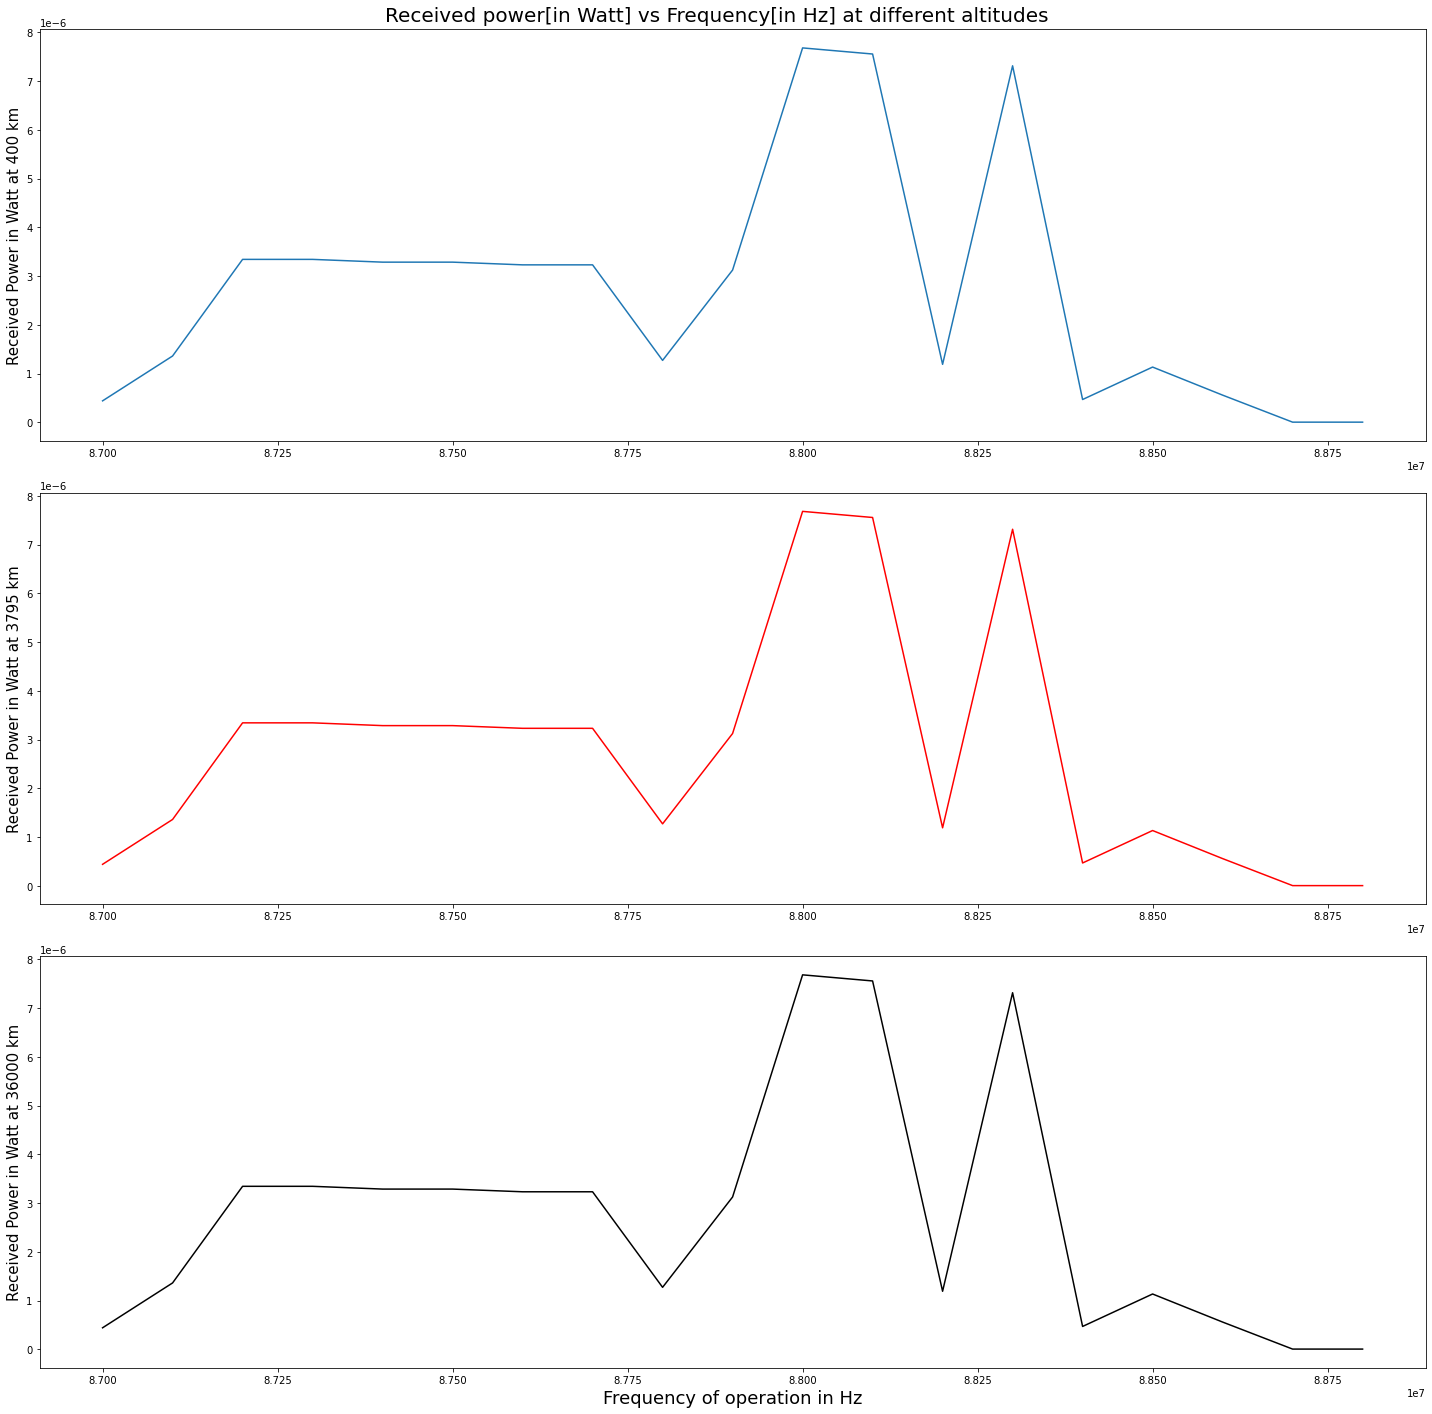

In [109]:
freq=np.arange(87e6,109e6,100e3) #Defining the axis of frequency in Hertz
Power_1=Power_2=Power_3=[None]*len(freq)

res= 300e3 #in Hz

for i in range(len(Comm_pixel1)):
    for j in range(len(df)):
        for k in range (len(df)):
            if Comm_pixel1[i]== pixel_indices[k] and np.abs(df.iloc[j]['Frequency(MHz)']*1e6-df.iloc[k]['Frequency(MHz)']*1e6)<= res:
                Power_1[k]+=df.iloc[k]['Rx_Power in Watt at 400 km']
            else:
                    Power_1[k]=df.iloc[k]['Rx_Power in Watt at 400 km']
                    
                    
for a in range(len(Comm_pixel2)):
    for b in range(len(df)):
        for c in range (len(df)):
      
            if Comm_pixel2[a]== pixel_indices[c] and np.abs(df.iloc[b]['Frequency(MHz)']*1e6-df.iloc[c]['Frequency(MHz)']*1e6)<= res:
                 Power_2[c]+=df.iloc[c]['Rx_Power in Watt at 3794.7331922 km']   
            else:
                    Power_2[c]=df.iloc[c]['Rx_Power in Watt at 3794.7331922 km']
                    
                    
                    
                    
for r in range(len(Comm_pixel3)):
    for s in range(len(df)):
        for t in range (len(df)):
            if Comm_pixel3[r]== pixel_indices[t] and np.abs(df.iloc[s]['Frequency(MHz)']*1e6-df.iloc[t]['Frequency(MHz)']*1e6)<= res:
                Power_3[t]+=df.iloc[t]['Rx_Power in Watt at 36000 km']
            else:
                    Power_3[t]=df.iloc[t]['Rx_Power in Watt at 36000 km']
                
          
           
fig,axs=plt.subplots(3,1,figsize=(20,20))
axs[0].plot(freq,Power_1)
axs[1].plot(freq,Power_2,color='red')
axs[2].plot(freq,Power_3,color='black')

axs[0].set_ylabel("Received Power in Watt at 400 km",fontsize=15)
axs[1].set_ylabel("Received Power in Watt at 3795 km",fontsize=15)
axs[2].set_ylabel("Received Power in Watt at 36000 km",fontsize=15)

plt.xlabel("Frequency of operation in Hz",fontsize=18)
plt.suptitle("Received power[in Watt] vs Frequency[in Hz] at different altitudes",fontsize=20)
plt.tight_layout()
plt.show()

In [121]:
freq=np.arange(87e6,109e6,100e3) #Defining the axis of frequency in Hertz
Power_1=Power_2=Power_3=[None]*len(freq)

res= 300e3 #in Hz

for i in range(len(Comm_pixel1)):
    for j in range(len(df)):
        for k in range (len(df)):
            if Comm_pixel1[i]== pixel_indices[k] and np.abs(df.iloc[j]['Frequency(MHz)']*1e6-df.iloc[k]['Frequency(MHz)']*1e6)<= res:
                Power_1[k]+=df.iloc[k]['Rx_Power in Watt at 400 km']
            else:
                    Power_1[k]=df.iloc[k]['Rx_Power in Watt at 400 km']

Power_1    
plt.plot(freq,Power_1)
plt.xlabel("Frequency of operation in Hz",fontsize=14)
plt.ylabel("Received Power in Watt at 400 km",fontsize=14)

plt.show()

IndexError: list assignment index out of range

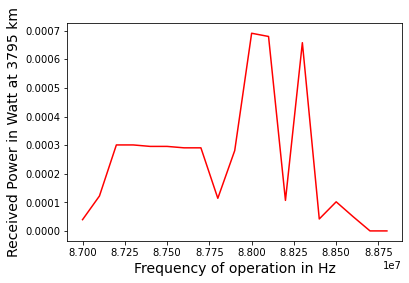

In [104]:
for i in range(len(Comm_pixel2)):
    for j in range(len(df)):
        for k in range (len(df)):
      
            if Comm_pixel2[i]== pixel_indices[k] and np.abs(df.iloc[j]['Frequency(MHz)']*1e6-df.iloc[k]['Frequency(MHz)']*1e6)<= res:
                 Power_2[k]+=df.iloc[k]['Rx_Power in Watt at 3794.7331922 km']   
            else:
                    Power_2[k]=df.iloc[k]['Rx_Power in Watt at 3794.7331922 km']
Power_2
plt.plot(freq,Power_2,color='red')
plt.xlabel("Frequency of operation in Hz",fontsize=14)
plt.ylabel("Received Power in Watt at 3795 km",fontsize=14)
plt.show()

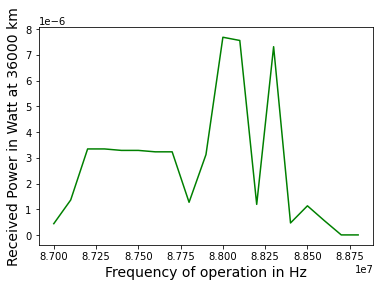

In [103]:
                    
for i in range(len(Comm_pixel3)):
    for j in range(len(df)):
        for k in range (len(df)):
            if Comm_pixel3[i]== pixel_indices[k] and np.abs(df.iloc[j]['Frequency(MHz)']*1e6-df.iloc[k]['Frequency(MHz)']*1e6)<= res:
                Power_3[k]+=df.iloc[k]['Rx_Power in Watt at 36000 km']
            else:
                    Power_3[k]=df.iloc[k]['Rx_Power in Watt at 36000 km']
Power_3
plt.plot(freq,Power_3,color='green')
plt.xlabel("Frequency of operation in Hz",fontsize=14)
plt.ylabel("Received Power in Watt at 36000 km",fontsize=14)
plt.show()

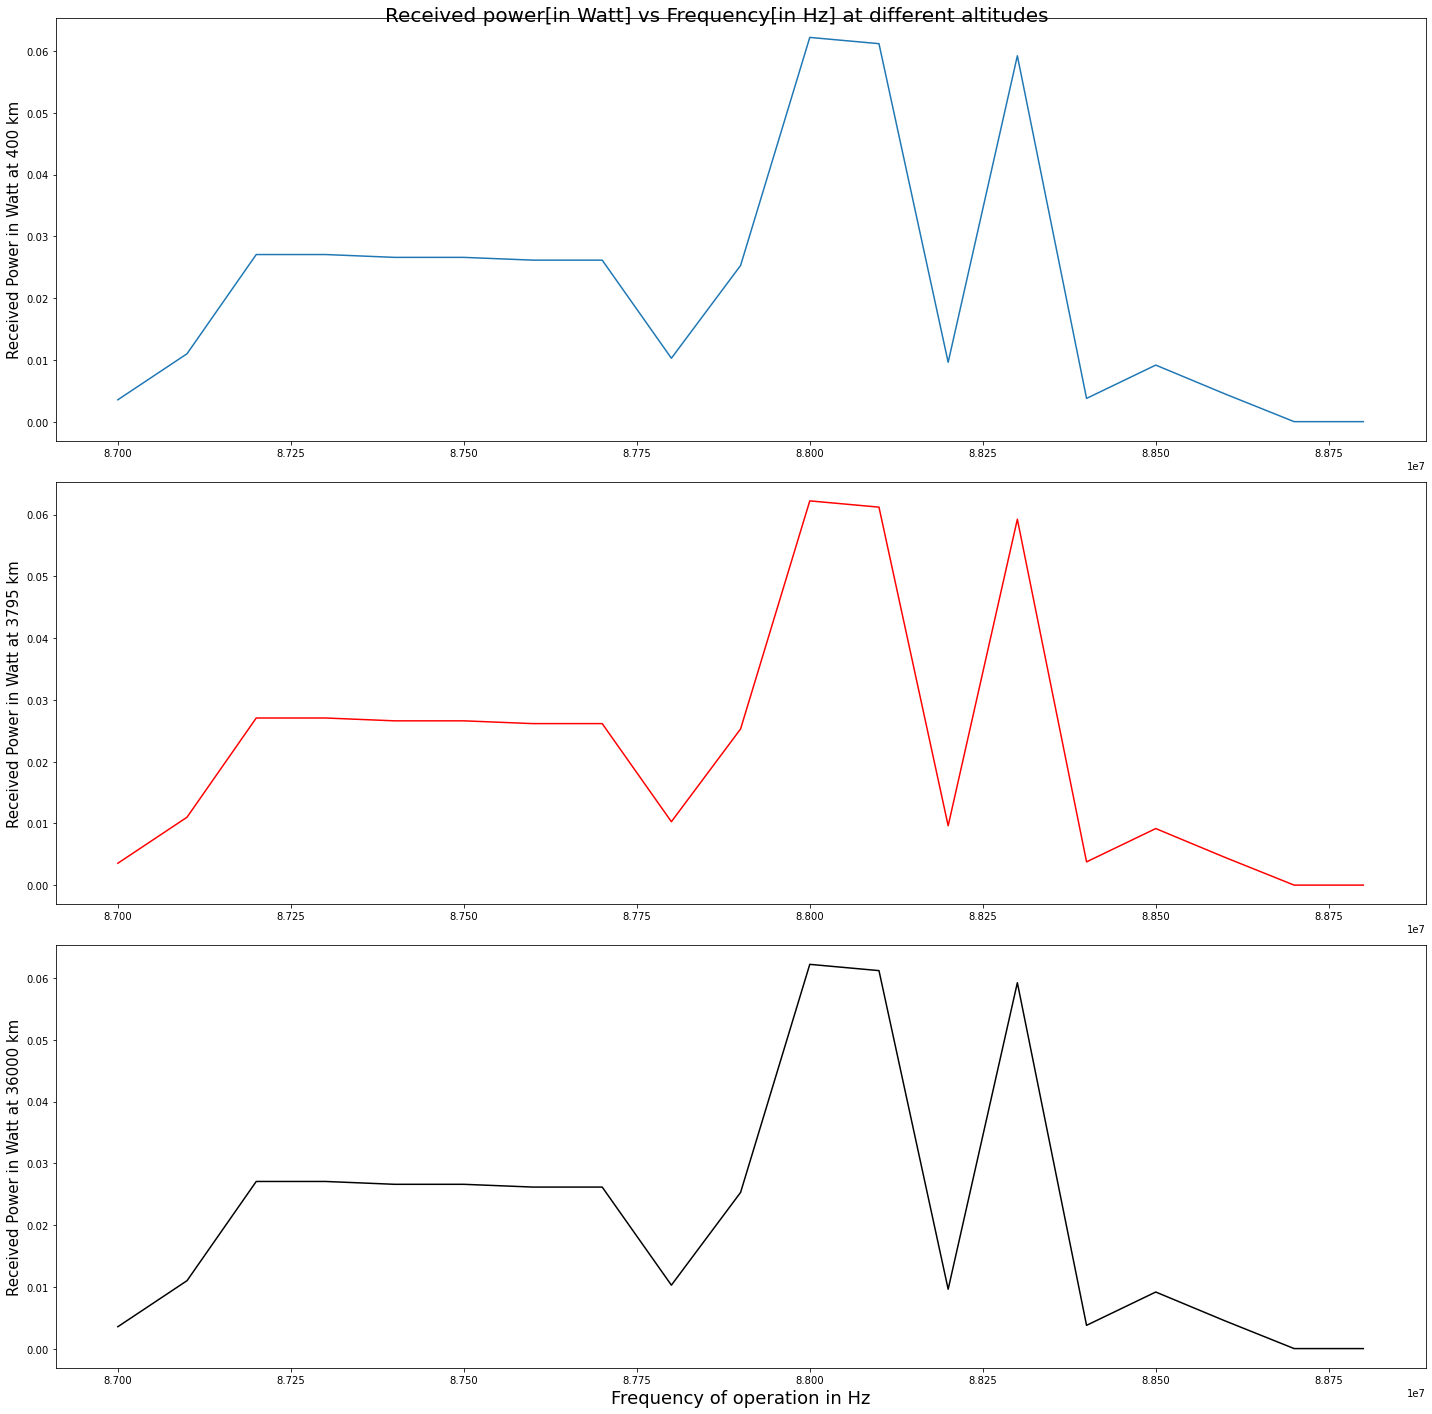

In [108]:
fig,axs=plt.subplots(3,1,figsize=(20,20))
axs[0].plot(freq,Power_1)
axs[1].plot(freq,Power_2,color='red')
axs[2].plot(freq,Power_3,color='black')

axs[0].set_ylabel("Received Power in Watt at 400 km",fontsize=15)
axs[1].set_ylabel("Received Power in Watt at 3795 km",fontsize=15)
axs[2].set_ylabel("Received Power in Watt at 36000 km",fontsize=15)

plt.xlabel("Frequency of operation in Hz",fontsize=18)
plt.suptitle("Received power[in Watt] vs Frequency[in Hz] at different altitudes",fontsize=20)
plt.tight_layout()
plt.show()